This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [18]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [2]:
train_images.shape

(60000, 784)

In [3]:
train_images_with_noise_channels.shape

(60000, 1568)

In [4]:
train_images_with_zeros_channels.shape

(60000, 1568)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)  # training with noise channels

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels, # training with zeros channels
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 2.3742 - accuracy: 0.1024 - val_loss: 2.3041 - val_accuracy: 0.1033
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 2.3042 - accuracy: 0.1076 - val_loss: 2.3030 - val_accuracy: 0.1133
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 2.3025 - accuracy: 0.1122 - val_loss: 2.3012 - val_accuracy: 0.1100
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 2.3021 - accuracy: 0.1109 - val_loss: 2.3007 - val_accuracy: 0.1128
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 2.3014 - accuracy: 0.1120 - val_loss: 2.3025 - val_accuracy: 0.1109
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 2.3012 - accuracy: 0.1123 - val_loss: 2.3016 - val_accuracy: 0.1129
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 2.2994 - accuracy: 0.1150 - val_loss: 2.3028 - val_accuracy: 0.1128
Epoch 

In [14]:
model = get_model()
history1 = model.fit(
    train_images, train_labels, # training with zeros channels
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 2.3166 - accuracy: 0.1032 - val_loss: 2.3072 - val_accuracy: 0.1059
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 2.3003 - accuracy: 0.1169 - val_loss: 2.3131 - val_accuracy: 0.0994
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 2.2909 - accuracy: 0.1284 - val_loss: 2.3196 - val_accuracy: 0.1001
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 2.2785 - accuracy: 0.1382 - val_loss: 2.3329 - val_accuracy: 0.1018
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 2.2608 - accuracy: 0.1512 - val_loss: 2.3415 - val_accuracy: 0.1001
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 2.2404 - accuracy: 0.1660 - val_loss: 2.3579 - val_accuracy: 0.0997
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 2.2169 - accuracy: 0.1831 - val_loss: 2.3805 - val_accuracy: 0.0938
Epoch 

**Plotting a validation accuracy comparison**

In [4]:
import matplotlib.pyplot as plt

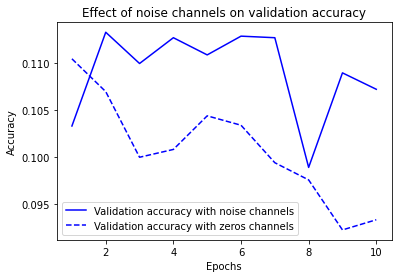

In [19]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

- The accuracy of noise channels and zeros channels looks different.

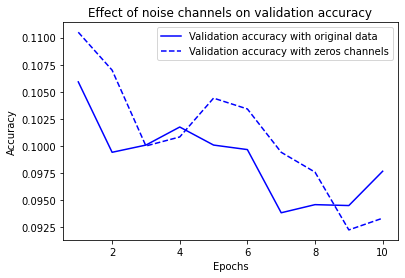

In [20]:
import matplotlib.pyplot as plt
val_acc = history1.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc, "b-",
         label="Validation accuracy with original data")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

- The accuracy of original data and zero channels are similar.

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [7]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 2.3159 - accuracy: 0.1016 - val_loss: 2.3040 - val_accuracy: 0.1046
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3001 - accuracy: 0.1145 - val_loss: 2.3134 - val_accuracy: 0.1046
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2907 - accuracy: 0.1256 - val_loss: 2.3176 - val_accuracy: 0.1043
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2762 - accuracy: 0.1410 - val_loss: 2.3342 - val_accuracy: 0.1010
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2580 - accuracy: 0.1529 - val_loss: 2.3456 - val_accuracy: 0.1008
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2380 - accuracy: 0.1686 - val_loss: 2.3565 - val_accuracy: 0.1004
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2161 - accuracy: 0.1807 - val_loss: 2.3763 - val_accuracy: 0.0972

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),   # incorrectly high LR
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2) 

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/10
375/375 [==============================] - 8s 7ms/step - loss: 1063.2522 - accuracy: 0.4013 - val_loss: 2.1798 - val_accuracy: 0.2371
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 3.8574 - accuracy: 0.2770 - val_loss: 2.0820 - val_accuracy: 0.2458
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 2.9042 - accuracy: 0.2606 - val_loss: 2.5206 - val_accuracy: 0.3030
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 2.9141 - accuracy: 0.2673 - val_loss: 2.1006 - val_accuracy: 0.2184
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 2.7135 - accuracy: 0.2900 - val_loss: 2.4255 - val_accuracy: 0.3033
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 2.7035 - accuracy: 0.2772 - val_loss: 2.7467 - val_accuracy: 0.2279
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 2.6746

- Both training and valid acc does not improve.

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),   #modify gradient descent parameter
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3713 - accuracy: 0.9086 - val_loss: 0.1428 - val_accuracy: 0.9578
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1440 - accuracy: 0.9622 - val_loss: 0.1772 - val_accuracy: 0.9610
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1147 - accuracy: 0.9733 - val_loss: 0.2181 - val_accuracy: 0.9598
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0987 - accuracy: 0.9774 - val_loss: 0.2289 - val_accuracy: 0.9634
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0917 - accuracy: 0.9812 - val_loss: 0.2639 - val_accuracy: 0.9640
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0836 - accuracy: 0.9836 - val_loss: 0.2504 - val_accuracy: 0.9678
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0751 - accuracy: 0.9862 - val_loss: 0.2006 - val_accuracy: 0.9743
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")]) #defining model with one layer which is simple logistic regression model
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6752 - accuracy: 0.8347 - val_loss: 0.3578 - val_accuracy: 0.9043
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3508 - accuracy: 0.9041 - val_loss: 0.3102 - val_accuracy: 0.9129
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3154 - accuracy: 0.9120 - val_loss: 0.2910 - val_accuracy: 0.9180
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2996 - accuracy: 0.9166 - val_loss: 0.2800 - val_accuracy: 0.9236
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2895 - accuracy: 0.9193 - val_loss: 0.2754 - val_accuracy: 0.9233
Epoch 6/20
375/375 [==============================] - 3s 7ms/step - loss: 0.2830 - accuracy: 0.9212 - val_loss: 0.2734 - val_accuracy: 0.9241
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2780 - accuracy: 0.9223 - val_loss: 0.2707 - val_accuracy: 0.9252
Epoch 

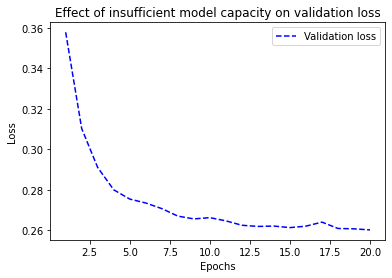

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- Valid loss is getting lower. 
- We can train the model better!

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"), # increase our model capacity adding two more dense layers
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3648 - accuracy: 0.8965 - val_loss: 0.1898 - val_accuracy: 0.9450
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1611 - accuracy: 0.9532 - val_loss: 0.1404 - val_accuracy: 0.9604
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1137 - accuracy: 0.9659 - val_loss: 0.1227 - val_accuracy: 0.9642
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0875 - accuracy: 0.9743 - val_loss: 0.1009 - val_accuracy: 0.9695
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0708 - accuracy: 0.9791 - val_loss: 0.0975 - val_accuracy: 0.9718
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0578 - accuracy: 0.9826 - val_loss: 0.1057 - val_accuracy: 0.9704
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0498 - accuracy: 0.9846 - val_loss: 0.1020 - val_accuracy: 0.9735
Epoch 

- much better result

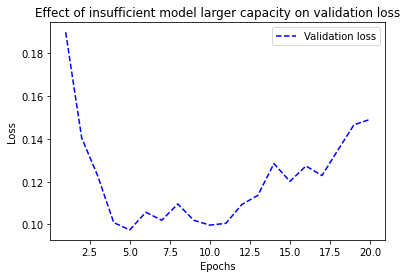

In [10]:
import matplotlib.pyplot as plt
val_loss_large = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_large, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model larger capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- have better loss but it also overfitting

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [11]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 44ms/step - loss: 0.5288 - accuracy: 0.7807 - val_loss: 0.3954 - val_accuracy: 0.8661
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3170 - accuracy: 0.8979 - val_loss: 0.3082 - val_accuracy: 0.8893
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2323 - accuracy: 0.9241 - val_loss: 0.2831 - val_accuracy: 0.8881
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1836 - accuracy: 0.9395 - val_loss: 0.2943 - val_accuracy: 0.8804
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1478 - accuracy: 0.9532 - val_loss: 0.3334 - val_accuracy: 0.8655
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1280 - accuracy: 0.9585 - val_loss: 0.3105 - val_accuracy: 0.8803
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1042 - accurac

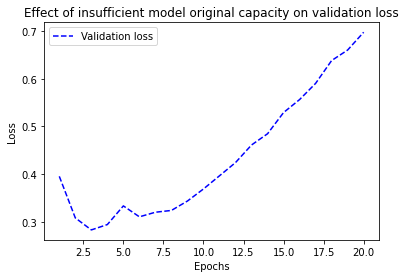

In [13]:
import matplotlib.pyplot as plt
val_loss_original = history_original.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original , "b--",
         label="Validation loss")
plt.title("Effect of insufficient model original capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**Version of the model with lower capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.6335 - accuracy: 0.6173 - val_loss: 0.5826 - val_accuracy: 0.7375
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.5401 - accuracy: 0.7779 - val_loss: 0.5300 - val_accuracy: 0.8196
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4864 - accuracy: 0.8427 - val_loss: 0.5003 - val_accuracy: 0.8138
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4488 - accuracy: 0.8811 - val_loss: 0.4860 - val_accuracy: 0.8261
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4191 - accuracy: 0.9074 - val_loss: 0.4681 - val_accuracy: 0.8585
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3944 - accuracy: 0.9239 - val_loss: 0.4551 - val_accuracy: 0.8762
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3720 - accuracy: 0.9387 - val_loss: 0.4622 - val_accuracy: 0.8597
Epoch 8/20
30

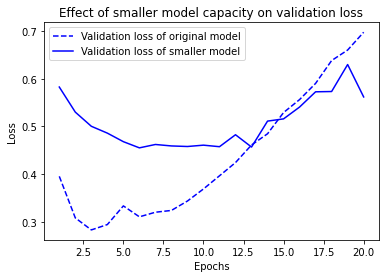

In [18]:
import matplotlib.pyplot as plt
val_loss_original = history_original.history["val_loss"]
val_loss_smaller = history_smaller_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original , "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_smaller, "b-",
         label="Validation loss of smaller model")
plt.title("Effect of smaller model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- The valid loss of smaller model do not overfit but performs not very good.

**Version of the model with higher capacity**

In [15]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5507 - accuracy: 0.7373 - val_loss: 0.3064 - val_accuracy: 0.8807
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2631 - accuracy: 0.8966 - val_loss: 0.5444 - val_accuracy: 0.7819
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1578 - accuracy: 0.9402 - val_loss: 0.2876 - val_accuracy: 0.8899
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0866 - accuracy: 0.9705 - val_loss: 0.3388 - val_accuracy: 0.8872
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1198 - accuracy: 0.9735 - val_loss: 0.3331 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0060 - accuracy: 0.9993 - val_loss: 0.4794 - val_accuracy: 0.8882
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 8.1812e-04 - accuracy: 0.9999 - val_loss: 0.5928 - val_accuracy: 0.8881
Epoch 8/2

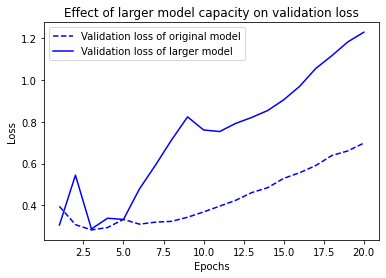

In [19]:
import matplotlib.pyplot as plt
val_loss_original = history_original.history["val_loss"]
val_loss_larger = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original , "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_larger, "b-",
         label="Validation loss of larger model")
plt.title("Effect of larger model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- Valid loss of larger model overfits very quickly.
- The original model is also overfitting after 5 epochs so we need to consider regularization.

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [20]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.5941 - accuracy: 0.7897 - val_loss: 0.4579 - val_accuracy: 0.8734
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3925 - accuracy: 0.8971 - val_loss: 0.3857 - val_accuracy: 0.8846
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3274 - accuracy: 0.9168 - val_loss: 0.3617 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2959 - accuracy: 0.9281 - val_loss: 0.3546 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2746 - accuracy: 0.9336 - val_loss: 0.3985 - val_accuracy: 0.8666
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2594 - accuracy: 0.9395 - val_loss: 0.3994 - val_accuracy: 0.8678
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2552 - accuracy: 0.9381 - val_loss: 0.3588 - val_accuracy: 0.8842
Epoch 8/20
30

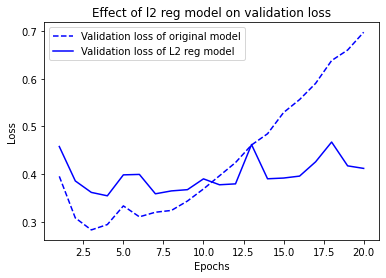

In [23]:

import matplotlib.pyplot as plt
val_loss_original = history_original.history["val_loss"]
val_loss_l2_reg = history_l2_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original , "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_l2_reg, "b-",
         label="Validation loss of L2 reg model")
plt.title("Effect of l2 reg model on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [21]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.6411 - accuracy: 0.6233 - val_loss: 0.5314 - val_accuracy: 0.8483
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5120 - accuracy: 0.7614 - val_loss: 0.3858 - val_accuracy: 0.8750
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4167 - accuracy: 0.8301 - val_loss: 0.3266 - val_accuracy: 0.8828
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3566 - accuracy: 0.8609 - val_loss: 0.2961 - val_accuracy: 0.8843
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3079 - accuracy: 0.8857 - val_loss: 0.2836 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2669 - accuracy: 0.9055 - val_loss: 0.2809 - val_accuracy: 0.8909
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2322 - accuracy: 0.9205 - val_loss: 0.2901 - val_accuracy: 0.8867
Epoch 8/20
30

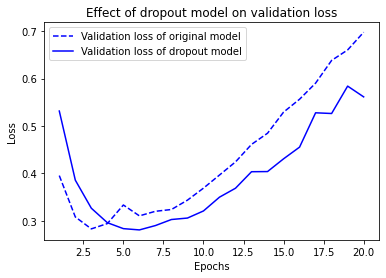

In [24]:
import matplotlib.pyplot as plt
val_loss_original = history_original.history["val_loss"]
val_loss_dropout = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original , "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_dropout, "b-",
         label="Validation loss of dropout model")
plt.title("Effect of dropout model on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


## Summary